# <snap style="color:#579676"> 2nd project: Handwriting Digit classification using ANN </span>

### <snap style="color:red"> MultiClass calssification Problem: </snap>


We are going to work on MNIST dataset. It contains 70,000 images of handwritten numbers. It is a labelled data.
The resolution of an image is 28x28.

### <snap style="color:red"> Importing Libraries: </snap>


In [27]:
import numpy as np
from tensorflow import keras # importing keras
from keras.layers import Dense, Flatten 
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt

### <snap style="color:red"> Loading Dataset: </snap>


In [28]:
(X_train, y_train),(X_test , y_test) = keras.datasets.mnist.load_data()

**We dont have to train test split the data. It is already splitted data.**

In [29]:
X_train.shape

(60000, 28, 28)

**X_train is a 3d array. There are 60,000 images in the X_train. Each image is a 28 by 28 array.**
### <snap style="color:red"> What does it mean. What is it representing: </snap>
[

    [

        [0,0,0,...28 values], # 28 columns in 1st row

        [0,0,0,...28 values], # 28 columns in 2nd row

        [0,0,0,...28 values], # 28 columns in 3rd row. Similarly, there are 28 rows.

        .... 

    ],

            **The upper 2d array representing 1st picture. The below one representing 2nd picture.** 
            **And like this there are total 70,000 pictures or you can say 70,000 2d arrays**

    [

        [0,0,0,...28 values], # 28 columns in 1st row
        
        [0,0,0,...28 values], # 28 columns in 2nd row
        
        [0,0,0,...28 values], # 28 columns in 3rd row. Similarly, there are 28 rows.
        
        .... 
    ]

            Like the upper two 2d arrays, there are 70k 2d arrays enclosed in this bracket
]

### <snap style="color:red"> Displaying the values of arrays of whole training dataset: </snap>


In [30]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

### <snap style="color:red"> Displaying the values of array image of training dataset: </snap>


In [31]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [32]:
X_train[0].shape

(28, 28)

**Y contain the labels of the images.**

In [33]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### <snap style="color:red"> Displaying the one image of training dataset: </snap>


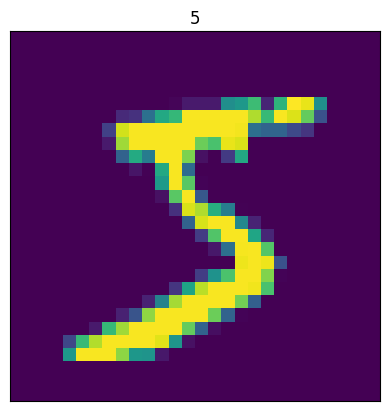

In [43]:
plt.title(y_train[0])
plt.xticks(ticks=[]) # to remove the xticks
plt.yticks(ticks=[]) # to remove the yticks
plt.imshow(X_train[0])

**Now we will create a neural network and then pass this dataset to that neural network.**




### <snap style="color:red"> Standard Scalling or preprocessing the data: </snap>

In [45]:
X_train = X_train/255
X_test = X_test/255

### <snap style="color:red"> Creating the neural network: </snap>

ok, something interesting. Flattening of arrays is required before passing to the model. **But why flattening is necessor:**

> Data is in the foramt of 28x28. 2d array. 

> While neural network take single value. We can't pass values like 28x28. 

> We will flatten the array into 28x28=784. A 1d array. Then pass 784 to the model. 

In [47]:
model = Sequential()
model.add(Flatten(input_shape = (28,28))) # flatten layer. to flattten the data.

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax")) # for more than one classes, always use softmax in output layer. 

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


No training in first flatten layer.

now in 2nd layer, the 784 inputs are going into 128 nodes. total parameters = 784x128+128 = 100480. +128 are the biases

### <snap style="color:red"> Compilation of model: </snap>

In [54]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")

> In sparse_categorical_crosseentropy loss, we dont need to one hot encode our labeles.

> In categorical_crosseentropy loss, we have to one hot encode our labeles. 

### <snap style="color:red"> Fitting the model: </snap>

In [64]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2722 - val_loss: 0.2577
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2644 - val_loss: 0.2520
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2574 - val_loss: 0.2479
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2504 - val_loss: 0.2391
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2441 - val_loss: 0.2339
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2373 - val_loss: 0.2291
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2308 - val_loss: 0.2234
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2250 - val_loss: 0.2193
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2190 - val_loss: 0.2155
Epoch 10/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.213

### <snap style="color:red"> Prediction or testing the model: </snap>

In [65]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [66]:
y_prob 

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 9.9999994e-01,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0084159e-06, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

**The output is showing the probability.** 1 ky hony ki probability kia hy, 2 ki kia hy, 3 ki kia hy. 

But we have to see which number is predicted. For that we have to see the probability value representing which number the most.

In [67]:
y_pred = y_prob.argmax(axis=1)

This output is telling according to predicted values, the first letter has the highest probability to be 7. Not exact 7, have the highest probability among the 10 digits. 

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8969

### <snap style="color:red"> Plotting the loss and accuracy: </snap>

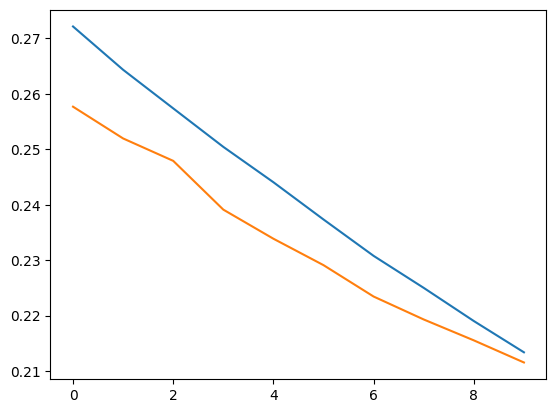

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

### Predictions

In [74]:
pred1 = model.predict(X_test[0].reshape(1,28,28))

1/1 [==============================] - 0s 33ms/step


In [76]:
pred1.argmax(axis=1)

array([7])

In [77]:
pred2 = model.predict(X_test[1].reshape(1,28,28))
pred2.argmax(axis=1)

1/1 [==============================] - 0s 37ms/step


array([2])

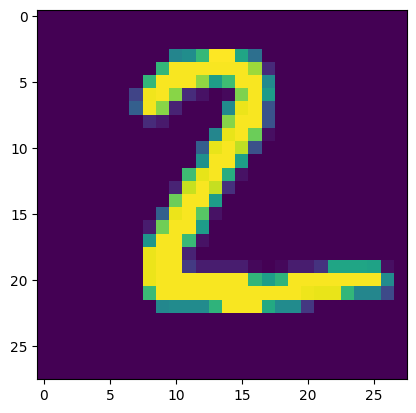

In [78]:
plt.imshow(X_test[1])